# DSC640 WEEKS 5 & 6
## EXERCISE 2.2
Datasets - You may also download them directly from this link: https://content.bellevue.edu/cst/dsc/640/datasets/ex3-2.zip

## Exercise Goal:
You need to submit 3 tree maps, 3 area charts and 3 stacked area charts using Tableau or PowerBI, Python and R using the data below (or your own datasets). You can also submit using D3. You can choose which library to use in Python or R, documentation is provided to help you decide and as you start to play around in the libraries, you will decide which you prefer.

I will be using THE PYTHON GRAPH GALLERY AS A SOURCE OF REFERENCE https://python-graph-gallery.com/201-control-the-color-of-treemap/

## CINDY HERRERA
January 16, 2020


### 1. Data collection: importing data and analyzing

In [32]:
import os
import datetime
import pprint
import pandas as pd
import numpy as np
import squarify  
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
os.getcwd()

'/Users/Cindy/Desktop/00 data640/ex3-3'

**Load data into dataframe**
(In the text file, I noticed each line had '/' so I used the sep function to clean the data being read into the dataset.)

In [34]:
df1 = pd.read_csv('/Users/Cindy/Desktop/00 data640/ex3-3/unemployement-rate-1948-2010.csv')
df2 = pd.read_csv('/Users/Cindy/Desktop/00 data640/ex3-3/expenditures.txt', sep = '\t')

**Check the dimension of table and view data**
Viewing the unmployement data

In [35]:
print("The dimension of the table is: ", df.shape)
      
print(df1)

The dimension of the table is:  (746, 4)
       Series id  Year Period  Value
0    LNS14000000  1948    M01    3.4
1    LNS14000000  1948    M02    3.8
2    LNS14000000  1948    M03    4.0
3    LNS14000000  1948    M04    3.9
4    LNS14000000  1948    M05    3.5
..           ...   ...    ...    ...
741  LNS14000000  2009    M10   10.1
742  LNS14000000  2009    M11   10.0
743  LNS14000000  2009    M12   10.0
744  LNS14000000  2010    M01    9.7
745  LNS14000000  2010    M02    9.7

[746 rows x 4 columns]


Now viewing the expenditures

In [36]:
print("The dimension of the table is: ", df2.shape)
      
print(df2)

The dimension of the table is:  (350, 4)
     year             category  expenditure  sex
0    2008                 Food         6443    1
1    2008  Alcoholic Beverages          444    1
2    2008              Housing        17109    1
3    2008              Apparel         1801    1
4    2008       Transportation         8604    1
..    ...                  ...          ...  ...
345  1984            Education          303    1
346  1984     Tobacco Products          228    1
347  1984        Miscellaneous          451    1
348  1984   Cash Contributions          706    1
349  1984   Personal Insurance         1897    1

[350 rows x 4 columns]


In [37]:
df1.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [38]:
df2.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


### 2. Data formatting

Calculate the total expenditure for categories in the dataframe

In [49]:
df2_cat = df2.groupby(['category'])['expenditure'].sum().reset_index()
df2_cat.head()

,category,expenditure
0,Alcoholic Beverages,8424
1,Apparel,41833
2,Cash Contributions,27987
3,Education,14498
4,Entertainment,44273


Calculate the total expenditure by year in the dataframe

In [50]:
df2_year = df2.groupby(['year'])['expenditure'].sum().reset_index()
df2_year.head()

,year,expenditure
0,1984,21972
1,1985,23489
2,1986,23865
3,1987,24415
4,1988,25893


### Treemap
I will be using the df2-Expenditure data for this example 

<function matplotlib.pyplot.show(*args, **kw)>

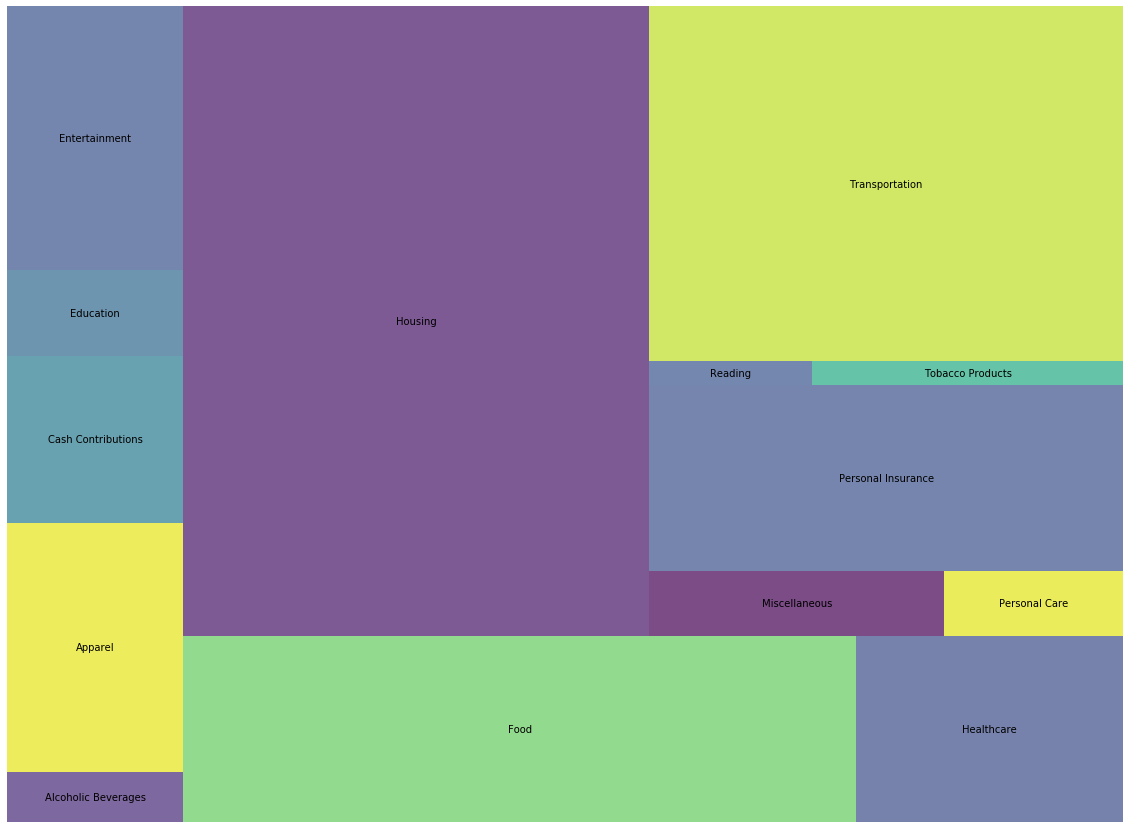

In [44]:
fig = plt.figure(figsize=(20,15))
squarify.plot(sizes=df2_cat['expenditure'], label=df2_cat['category'], alpha=.7)
plt.axis('off')
plt.show

### Area Chart
Now in this example we are going to view expenditures over time series

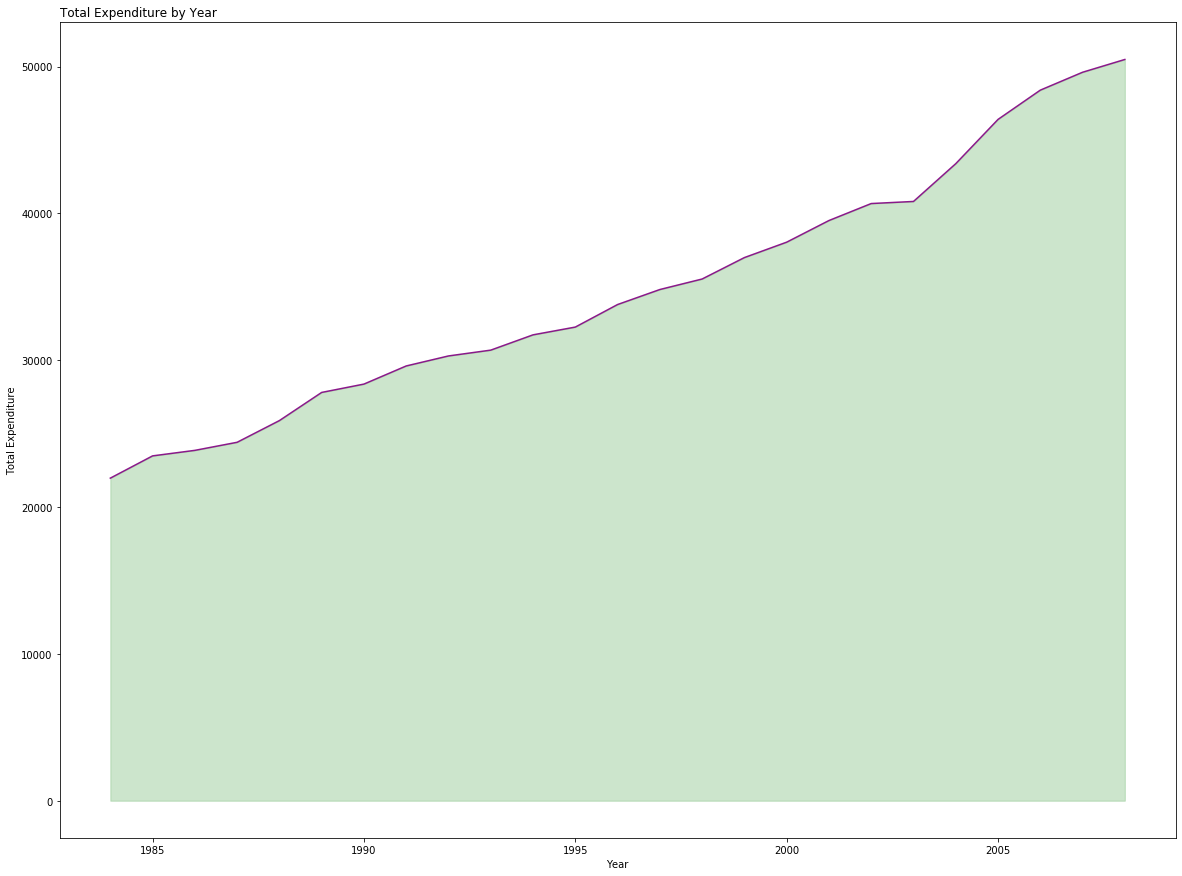

In [53]:
fig = plt.figure(figsize=(20,15))
x = df2_year['year']
y = df2_year['expenditure']
 

plt.fill_between( x, y, color='green', alpha=0.2)
plt.title('Total Expenditure by Year', loc='left')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.plot(x, y, color='purple', alpha=0.9)

### Stacked Area Chart
In this chart we are going to review th progress over each year by stacking the expenditures results over time

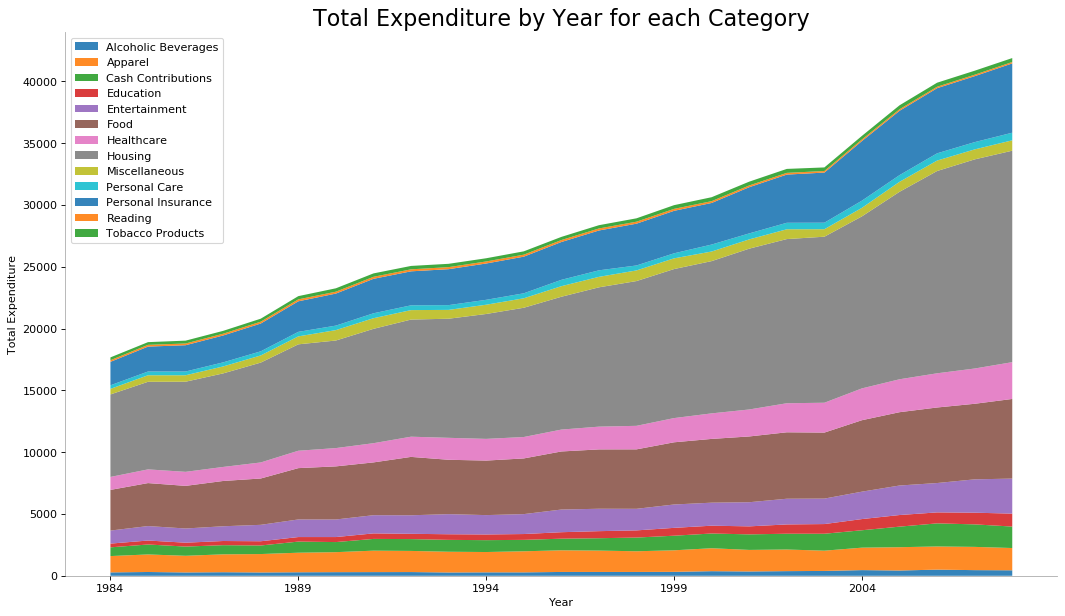

In [56]:
plt_df2 = df2.loc[:, df2.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
plt_df2.reset_index(level=0, inplace=True)

fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = plt_df2.columns[1:]
labs = plt_df2.values.tolist()

# sort the data
x  = plt_df2['year'].values.tolist()
y0 = plt_df2[columns[0]].values.tolist()
y1 = plt_df2[columns[1]].values.tolist()
y2 = plt_df2[columns[2]].values.tolist()
y3 = plt_df2[columns[3]].values.tolist()
y4 = plt_df2[columns[4]].values.tolist()
y5 = plt_df2[columns[5]].values.tolist()
y6 = plt_df2[columns[6]].values.tolist()
y7 = plt_df2[columns[7]].values.tolist()
y8 = plt_df2[columns[8]].values.tolist()
y9 = plt_df2[columns[9]].values.tolist()
y10 = plt_df2[columns[10]].values.tolist()
y11 = plt_df2[columns[11]].values.tolist()
y12 = plt_df2[columns[12]].values.tolist()
y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12])

# Plotting for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.9)

# Insert the title
ax.set_title('Total Expenditure by Year for each Category', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Expenditure')

# Edits to the legend
ax.legend(fontsize=10, ncol=1, loc = 'upper left')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Display graph
plt.show()